In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as ms
import os
import random

In [ ]:
#for accsess data
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

**working on 1 dataset kaggle_visible_evaluation_triplets.txt**




In [ ]:
df=pd.read_csv('kaggle_visible_evaluation_triplets.txt',sep='\t', names=['user_id','song_id','freq'])

In [ ]:
df.head()


,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [ ]:
df['song_id'].nunique()

163206

if we observed here there are 1,63,206 unique number of songs in triplets file

In [ ]:
df['user_id'].nunique()

110000

there are 1,10,000 unique users are observed here in triplets file

In [ ]:
df.shape

(1450933, 3)

In [ ]:
dup=df.duplicated()
sum(dup)
# there are no duplictes in triplets file

0

In [ ]:
print(sum(df.isnull().any())) # no null values are observed

0


**working on 2 dataset unique.txt**

In [ ]:
df1=pd.read_csv("unique_tracks.txt",sep='<SEP>',names=['track_id','song_id','artist_name','release']) 
df1=df1.drop(['track_id'],axis=1)
df1.shape

(1000000, 3)

### **10L unique tracks are observed in uniquqe_tracks file and here we drop the column track_id**

In [ ]:
df1.head()

,song_id,artist_name,release
0,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [ ]:
df1['song_id'].nunique()

999056

9,99,056 number of unique songs are available in unique_tracks file

**merging df and df1 on the bisis of "song_id"**.
it means that if song_id of df is present in df1 then only there will be merege if not then next song_id will select and same condtion will on that also. for help see the image.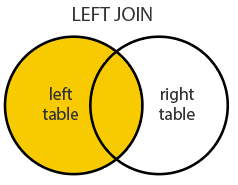

In [ ]:
df_final = pd.merge(df, df1.drop_duplicates(['song_id']), on='song_id',how='left')
df_final.head(10)

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,Beastie Boys,Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Moby,Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,Guano Apes,Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Guano Apes,Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,UDG,Kurtizana


here we merged the both the datasets according to the user_id matched song, it should merge only with respect to user listened songs in unique_tracks file, so here we dropped the duplicates, which removes similar identified rows 

In [ ]:
df_final.shape

(1450933, 5)

In [ ]:
print(sum(df_final.isnull().any()))

1


**there is one null value we will find it in which col there is null.**

In [ ]:
np.where(df_final['release'].isnull())[0]

array([192828])

**at row index 192828 there is null value now we will find col **

In [ ]:
df_final.iloc[[192828]]

,user_id,song_id,freq,artist_name,release
192828,7b3a62a418862aefc4b3d85feb191fa0fd752c69,SOZDBDL12AB018AFFF,1,Sébastien Roch,NaN


**we have found out that in the release there is nan value.now we will find any artist named as 'Sébastien Roch' has any release or not. if not then we will drop it.**

In [ ]:
np.where(df_final['artist_name']=='Sébastien Roch')

(array([192828]),)

**there is not any release for 'Sébastien Roch' so we will delete the row 192828.**

In [ ]:
df_final=df_final.drop(labels=192828, axis=0)

In [ ]:
print(sum(df_final.isnull().any()))

0


In [ ]:
df_final.shape

(1450932, 5)

In [ ]:
dup3=df_final.duplicated()
sum(dup3)

0

In [ ]:
print('total datapoints',df_final.shape[0])
print('total number of user',df_final['user_id'].unique().shape[0])
print('total number of songs',df_final['song_id'].unique().shape[0])

total datapoints 1450932
total number of user 110000
total number of songs 163205


In [ ]:
print('total number of release',df_final['release'].unique().shape[0])
print('total number of artist',df_final['artist_name'].unique().shape[0])

total number of release 137622
total number of artist 28360


In [ ]:
df_final.describe()

,freq
count,1.450932e+06
mean,3.187151e+00
std,7.051666e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   freq         1450932 non-null  int64 
 3   artist_name  1450932 non-null  object
 4   release      1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


In [ ]:
df_final.columns

Index(['user_id', 'song_id', 'freq', 'artist_name', 'release'], dtype='object')

Text(0, 0.5, 'Song ID')

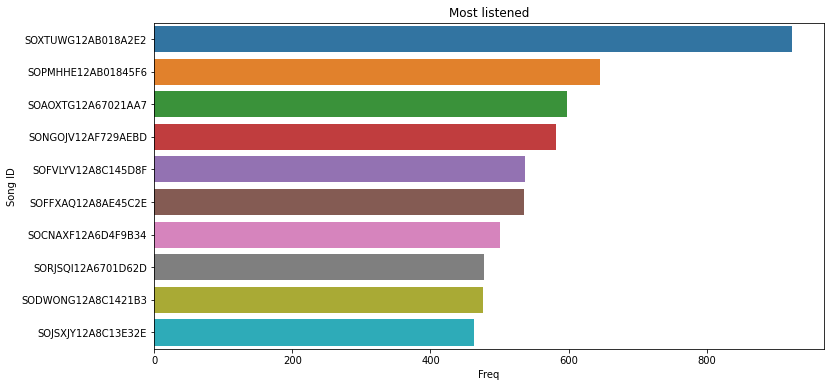

In [ ]:
freq=df_final.sort_values('freq',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=freq['freq'].head(15), y=freq['song_id'].head(10), data=freq)
plt.title('Most listened')
plt.xlabel('Freq')
plt.ylabel('Song ID')

**We have found that a song_id SOXTUWG12AB018A2E2 is most time played. Now, we will find song and artist.**

In [ ]:
np.where(df_final['song_id']=='SOXTUWG12AB018A2E2')

(array([1449166]),)

In [ ]:
df_final.iloc[[1449166]]

,user_id,song_id,freq,artist_name,release
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


**By this anlysis, we can find that artist name='Kilgore' and realase='Drop The Hammer (Album Version)' is most palyed by a crzay user whose user_id is='22bb29714137fa47083963c30e1a26f1bf517e7d' palyed this song 923 times** 

**in the continous of this anlysis we are going to find 5 most crazy users and there crzay choice song.**

In [ ]:
most_played_song_by_one_user=df_final['freq'].value_counts().tail(5)
most_played_song_by_one_user

262    1
187    1
259    1
189    1
923    1
Name: freq, dtype: int64

In [ ]:
#print(df_final[(df_final.freq==923)])
#print(df_final[(df_final.freq==262)])
#print(df_final[(df_final.freq==259)])
print(df_final[(df_final.freq==189)])
df_final[(df_final.freq==187)]

                                         user_id  ...                        release
311739  efd470cc7311509e0bd24c5510262d80bc95eb54  ...  Unite (2009 Digital Remaster)

[1 rows x 5 columns]


,user_id,song_id,freq,artist_name,release
927480,ccf9db671153c78301f2fc2fe7dd9df9aa7f8a30,SOTFIPT12A6701F2FA,187,Red Hot Chili Peppers,Fortune Faded (Album Version)


**The top most 5 crazy users who have played their favt song in crazy way** 

1.   22bb29714137fa47083963c30e1a26f1bf517e7d
2.   70c9faa9bf2149c6ea98cf3a099077971fe6e9b9
3.   d4da4dc045d2a9ad7e55f266e627e6096325a678
4.   efd470cc7311509e0bd24c5510262d80bc95eb54
5.   ccf9db671153c78301f2fc2fe7dd9df9aa7f8a30



In [64]:
df_final[df_final['freq']>=500] # this cell had the info about the songs with greater than 500 listened times
                                # there are only 7 users who had listened their favourite songs with more than or equal to 500 times

,user_id,song_id,freq,artist_name,release
178584,fa82c0a1a93b7c52870d7b0a004b444bbdf19401,SOCNAXF12A6D4F9B34,500,Alliance Ethnik,Creil City
363980,9d12c30de5d9975f621f95f512699989ac544410,SOFFXAQ12A8AE45C2E,535,Fear My Thoughts,Death Chamber
471133,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597,Ms. Dynamite / Kymani Marley,Seed Will Grow
642730,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537,Us3,Believe In Yourself
838445,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646,The Beach Boys,What Is a Young Girl Made of
1297745,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582,Queen,Somebody To Love
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


In [72]:
df_final[df_final['freq']>=100]

,user_id,song_id,freq,artist_name,release
4043,ab8218336efff9f880d3a0e24b53a7aa7ebbf4b6,SOJSXJY12A8C13E32E,125,Clara Hill,Clara meets Slope - Hard To Say
5056,96deca47a75bb70478c086f435426485d575746a,SOFTZUB12AB0188C67,150,Kruder & Dorfmeister,High Noon
5064,96deca47a75bb70478c086f435426485d575746a,SOOFEHM12A8AE457B4,241,Kylie Minogue,Confide In Me
5068,96deca47a75bb70478c086f435426485d575746a,SOPGFGG12A8C136E3A,214,LU,Por Besarte
9376,8463ade505658a6f70e9cfaa948b3b8515e18072,SOFGTEF12AB0185FF9,126,Chris Stills,Lucifer & Jane (LP Version)
...,...,...,...,...,...
1447287,ab979b06c4f6230267e66c6cb64e5d0ea24fc1ea,SOVALCK12A8C13C1F7,139,JK,You & I
1447541,4b4ff0c1b288b1b33a2e5f5cc9ce534a3a4446de,SOAWUML12A6D4F3FE1,121,Ziggy Marley And The Melody Makers,This One
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)
1449384,89058561f2d633baf415db0ac35aefedd0e4378c,SOBONKR12A58A7A7E0,111,Dwight Yoakam,You're The One


In [74]:
df_final[df_final['freq']>=100]['song_id'].nunique()
#there are 761 unique songs users listen each song more than or eqqual to 100 times

761

In [78]:
df_final[df_final['freq']>=100]['song_id'].unique()
#these are the 761 unique songs that users listen each song more than or eqqual to 100 times

array(['SOJSXJY12A8C13E32E', 'SOFTZUB12AB0188C67', 'SOOFEHM12A8AE457B4',
       'SOPGFGG12A8C136E3A', 'SOFGTEF12AB0185FF9', 'SOKENKR12AB01828F7',
       'SOAUWYT12A81C206F1', 'SOTFCUM12A6D4F7D0B', 'SOEPDNA12AC3DF9820',
       'SOZVILY12AB01855ED', 'SOYBLYP12A58A79D32', 'SOSYLXK12A8C13F738',
       'SOQLHST12AB0184A27', 'SOMMONH12A6D4F41CD', 'SOLGLUC12AB018A8FA',
       'SOIKQFR12A6310F2A6', 'SOPUCYA12A8C13A694', 'SOJYISZ12A8C135F5A',
       'SODLLYS12A8C13A96B', 'SOOWXAQ12AB0188996', 'SOTEGWG12AB01897AC',
       'SOUNJIO12AB0181339', 'SOSJRJP12A6D4F826F', 'SONQCXC12A6D4F6A37',
       'SOMGVYU12A8C1314FF', 'SOHPOMX12A58A7D506', 'SOBVCRB12A8C139012',
       'SOTRQKZ12AB018E90B', 'SOIZFTE12AB0186842', 'SOMOFOP12AB01825DD',
       'SOUVNUS12A8C14566E', 'SOQZQTH12AB0189AB8', 'SOACBLB12AB01871C7',
       'SOZCDWG12A6D4F81E1', 'SOYXUDL12A582A2695', 'SONPZTQ12A8C13865E',
       'SORIWEH12A8C13D4A6', 'SOEGIYH12A6D4FC0E3', 'SOMXSTV12AB018AA6E',
       'SOWAHLO12A8C13BB33', 'SOXJFKD12A3F1EA31A', 

In [73]:
df_final[df_final['freq']>=100]['user_id'].nunique() 
# there are 793 users who listens some songs more than or equal to 100 times

793

In [80]:
df_final[df_final['freq']<=1] 
# this is the list of 1 time listened songs

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero
...,...,...,...,...,...
1450916,fc072bde2043756ea30ff07e4a5311e34825b4df,SORSIEU12AB017DCEC,1,Chris Rea,Speed
1450920,fc072bde2043756ea30ff07e4a5311e34825b4df,SOOMYKI12A8C13943C,1,L.S.G.,Into Deep (Clubmix 2)
1450922,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBOVYQ12A6D4F7CBA,1,Los Delinqüentes,Ya Nadie Te Quiere
1450926,5e650759ebf89012044c6d52121eeada8b0ec814,SODCNJX12A6D4F93CB,1,Natiruts,Jamaica Roots II(Agora E Sempre)


In [81]:
(df_final.groupby(by=['artist_name']).count()>1000).value_counts()
# there are 213 artists whose songs had greater than 1000 users

user_id  song_id  freq   release
False    False    False  False      28148
True     True     True   True         213
dtype: int64

In [82]:
df_final.artist_name.nunique() # there are 28,361 unique artists are available

28361

In [83]:
df_final.groupby(by=['artist_name']).count() 

,user_id,song_id,freq,release
artist_name,,,,
!!!,109,109,109,109
!Deladap,3,3,3,3
& And Oceans,2,2,2,2
'68 Comeback,22,22,22,22
'N Sync/Phil Collins,48,48,48,48
...,...,...,...,...
Étienne Daho,45,45,45,45
Íon,5,5,5,5
Ólafur Arnalds,78,78,78,78


In [84]:
df_final[df_final['artist_name']=='!!!'] # this is an abnormal activity which doesn't have any artist name for 109 rows

,user_id,song_id,freq,artist_name,release
23550,6de4f2710a3cf3138394d931215224efac265abf,SORLTDE12A6D4F5705,1,!!!,Must Be The Moon
82235,f6587207cba5d685999b650bb7b7701bacbb3c5d,SOKCVIN12A6D4F5709,2,!!!,Yadnus
89231,3b0eb941d6d0f8b6236f23be34810de9e5de5e87,SOESDGT12A6D4F570A,4,!!!,Bend Over Beethoven
97981,0de845be9e6514cfe5212c4615cb35e2aa0839ce,SOYHNTG12A6D4F5703,1,!!!,Myth Takes
106522,3a280d1855a284a73aa4275699456a1f7aa1303b,SOGRWKZ12A6D4F5708,1,!!!,Sweet Life
...,...,...,...,...,...
1408452,1b70a8a5ab97f9d92e183bd424ca87eaef6cb560,SOGRWKZ12A6D4F5708,6,!!!,Sweet Life
1410178,20f28480a33300f770a289f485f6f7e03a6a0277,SOGRWKZ12A6D4F5708,1,!!!,Sweet Life
1426426,0a5ce21d67387f5718334f75b60e2ce8b9169fee,SOYHNTG12A6D4F5703,1,!!!,Myth Takes
1426427,0a5ce21d67387f5718334f75b60e2ce8b9169fee,SOYDOCQ12A6D4F570B,1,!!!,Break In Case Of Anything


In [85]:
df_final.freq.mean(),df_final.freq.max(),df_final.freq.min(),df_final.freq.median(),df_final.freq.std()
# this cell had info for freq with its mean, max, min, medin, standard deviation values

(3.1871492343202616, 923, 1, 1.0, 7.05166361958703)

**in the contious we will find most played song by all user.**

In [65]:
df_final['release'].value_counts().head(5)

Sehr kosmisch                     5043
Undo                              4483
You're The One                    4270
Dog Days Are Over (Radio Edit)    3780
Revelry                           3672
Name: release, dtype: int64

**now lets find most played song's artist.**

In [66]:
df_final[(df_final.release == 'Sehr kosmisch')] # there are 5043 users for this artist and the song

,user_id,song_id,freq,artist_name,release
22,d68dc6fc25248234590d7668a11e3335534ae4b4,SOFRQTD12A81C233C0,1,Harmonia,Sehr kosmisch
366,c732f882aa8d6db3bfaf8037d6418f27d3e07fc8,SOFRQTD12A81C233C0,2,Harmonia,Sehr kosmisch
455,bdbf8ddd82fa83ef4538a15298dfca19bfc4a3ca,SOFRQTD12A81C233C0,11,Harmonia,Sehr kosmisch
564,6493c305190b52657d4ea3f4adf367ffcf3427af,SOFRQTD12A81C233C0,3,Harmonia,Sehr kosmisch
693,a5d92e23cf3f711dfc473f1c3b296492ec02effd,SOFRQTD12A81C233C0,7,Harmonia,Sehr kosmisch
...,...,...,...,...,...
1448701,f884ce6c56be78242d7d39b03856a6ec35ca0b7c,SOFRQTD12A81C233C0,6,Harmonia,Sehr kosmisch
1449061,cb7711f1f28de9a2873a026bab8f246198fed24f,SOFRQTD12A81C233C0,8,Harmonia,Sehr kosmisch
1449731,67bdd623ade703d9ab2f99e6e7a37c0d921fef0a,SOFRQTD12A81C233C0,4,Harmonia,Sehr kosmisch
1450521,bfda9b649c891832d18e416ade1fc554ba11dd19,SOFRQTD12A81C233C0,5,Harmonia,Sehr kosmisch


**we can find "harmonia" is most played artist for a single song and listened by 5043 unique users**

**now in contious we will find which user have played this song most. "sehr kosmisch" by harmoia.**

In [59]:
pop_song=df_final[df_final['song_id']=='SOFRQTD12A81C233C0'] 
pop_song  

,user_id,song_id,freq,artist_name,release
22,d68dc6fc25248234590d7668a11e3335534ae4b4,SOFRQTD12A81C233C0,1,Harmonia,Sehr kosmisch
366,c732f882aa8d6db3bfaf8037d6418f27d3e07fc8,SOFRQTD12A81C233C0,2,Harmonia,Sehr kosmisch
455,bdbf8ddd82fa83ef4538a15298dfca19bfc4a3ca,SOFRQTD12A81C233C0,11,Harmonia,Sehr kosmisch
564,6493c305190b52657d4ea3f4adf367ffcf3427af,SOFRQTD12A81C233C0,3,Harmonia,Sehr kosmisch
693,a5d92e23cf3f711dfc473f1c3b296492ec02effd,SOFRQTD12A81C233C0,7,Harmonia,Sehr kosmisch
...,...,...,...,...,...
1448701,f884ce6c56be78242d7d39b03856a6ec35ca0b7c,SOFRQTD12A81C233C0,6,Harmonia,Sehr kosmisch
1449061,cb7711f1f28de9a2873a026bab8f246198fed24f,SOFRQTD12A81C233C0,8,Harmonia,Sehr kosmisch
1449731,67bdd623ade703d9ab2f99e6e7a37c0d921fef0a,SOFRQTD12A81C233C0,4,Harmonia,Sehr kosmisch
1450521,bfda9b649c891832d18e416ade1fc554ba11dd19,SOFRQTD12A81C233C0,5,Harmonia,Sehr kosmisch


In [60]:
pop_song.max()

user_id        ffedd3bea08f4ef2c7e5df5821b5e79ef2ca6ae5
song_id                              SOFRQTD12A81C233C0
freq                                                135
artist_name                                    Harmonia
release                                   Sehr kosmisch
dtype: object

**hence we have find the user "ffedd3bea08f4ef2c7e5df5821b5e79ef2ca6ae5" has plyed the song( "sehr kosmisch" by harmoia.) most time(135). see also in graph**

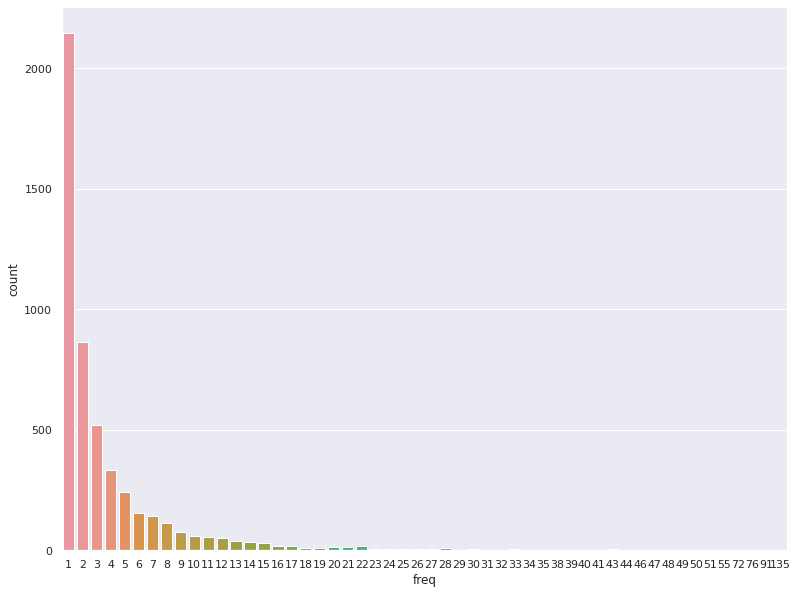

In [61]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(pop_song['freq'])

**In the contious, we will find most active user.**

In [62]:
most_user=df_final['user_id'].value_counts().head(5)
most_user

7d90be8dfdbde170f036ce8a4b915440137cb11c    53
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
Name: user_id, dtype: int64

**in the contious we will find most palyed artist.**

In [43]:
df_final['artist_name'].value_counts().head(5)

Coldplay                  12279
Kings Of Leon              8514
Florence + The Machine     8213
Justin Bieber              7669
Jack Johnson               6784
Name: artist_name, dtype: int64

**In the contious, we will find the coldplay artist's most played songs.**

In [46]:
data_Coldplay = df_final[(df_final.artist_name == 'Coldplay')]
data_Coldplay

,user_id,song_id,freq,artist_name,release
122,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOPXKYD12A6D4FA876,6,Coldplay,Yellow
336,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOKLRPJ12A8C13C3FE,1,Coldplay,The Scientist
353,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOWEJXA12A6701C574,5,Coldplay,Fix You
360,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOKLRPJ12A8C13C3FE,2,Coldplay,The Scientist
365,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOPXKYD12A6D4FA876,3,Coldplay,Yellow
...,...,...,...,...,...
1450525,b98e6137741a5ed1ffd03d81e0ade159ba4eeeeb,SOKLRPJ12A8C13C3FE,2,Coldplay,The Scientist
1450545,b98e6137741a5ed1ffd03d81e0ade159ba4eeeeb,SOUKJBT12A6701C4D6,3,Coldplay,Speed Of Sound
1450651,32d65b81f82874077bd978fa129eff63a43e96f9,SOPXKYD12A6D4FA876,2,Coldplay,Yellow
1450655,32d65b81f82874077bd978fa129eff63a43e96f9,SOSVPIE12A6D4FA873,1,Coldplay,Shiver


In [45]:
data_Coldplay['release'].value_counts().head(5)

The Scientist    1675
Clocks           1500
Yellow           1299
Fix You          1033
In My Place       531
Name: release, dtype: int64

In [47]:
data_Coldplay.song_id.nunique() # 76 songs are sung by codplay

76

In [50]:
data_Coldplay.freq.max() # a song by coldplay had highest frequency of 261

261

In [52]:
data_Coldplay[data_Coldplay['freq']==261] # we can observe here info about highes listened song by coldplay artist

,user_id,song_id,freq,artist_name,release
558905,6a048c2e7fe977abb52aff4c43889f2819788c54,SOPXKYD12A6D4FA876,261,Coldplay,Yellow


In [54]:
cold_freq=df_final[df_final['song_id']=='SOPXKYD12A6D4FA876'] # there are 1299 users listened the most popular song by coldplay
cold_freq

,user_id,song_id,freq,artist_name,release
122,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOPXKYD12A6D4FA876,6,Coldplay,Yellow
365,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOPXKYD12A6D4FA876,3,Coldplay,Yellow
1642,36a35718d262b62cf00f038d76c4920912501b8a,SOPXKYD12A6D4FA876,5,Coldplay,Yellow
1794,071fd3aabca95437e6c390938ec79ad9ca4f3ece,SOPXKYD12A6D4FA876,2,Coldplay,Yellow
5053,6ad224a05378c6614ea08019a9494ee811d6c7e0,SOPXKYD12A6D4FA876,4,Coldplay,Yellow
...,...,...,...,...,...
1442468,60318fb458930606b80edbc190ea57609c818d44,SOPXKYD12A6D4FA876,1,Coldplay,Yellow
1443009,2ee1adf0cdac5444af8c9186e5e3d432abcbea43,SOPXKYD12A6D4FA876,4,Coldplay,Yellow
1445129,4b9cabf788964a5668be6b05986a7cd1056f28e8,SOPXKYD12A6D4FA876,1,Coldplay,Yellow
1449505,32d1d1dc07de0f6e46495d98243ce412d705efda,SOPXKYD12A6D4FA876,4,Coldplay,Yellow


In [55]:
cold_freq.freq.sum() # total 3,879 times the popular song of coldplay is listened by 1299 users

3879

**The above songs are most palyed song of our most played artist (coldplay)**

In [56]:
df_final['artist_name'].value_counts().tail(5)

Killa Kela     1
Andy Tau       1
The Violets    1
Craig Safan    1
Seven Wiser    1
Name: artist_name, dtype: int64

**By the above analysis, we can find that user that have only one release.**



[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Freq')]

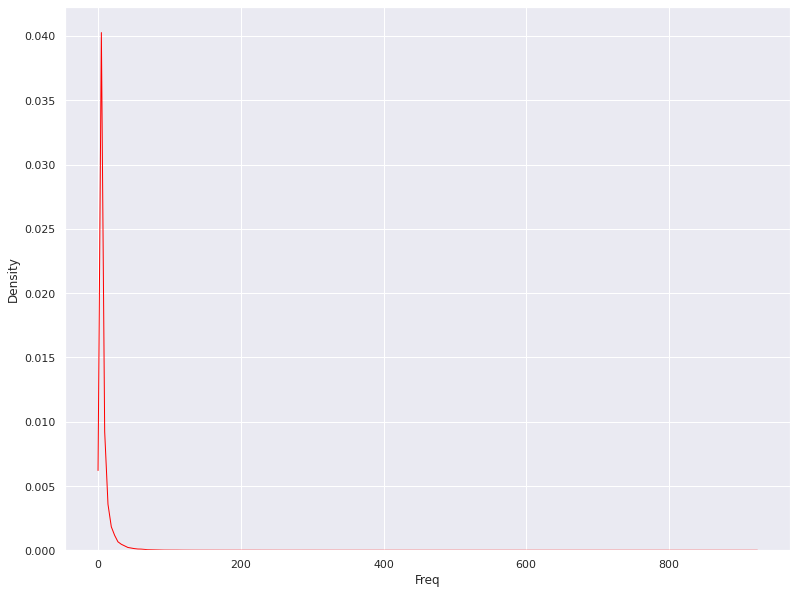

In [ ]:
freq1=sns.distplot(df_final['freq'], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
freq1.set(xlabel="Freq", ylabel = "Density")

**by this graph we get to know about that there are very much less song which has more freq**

In [63]:
print(df_final.groupby(['freq']).size())

freq
1      839136
2      213712
3       95726
4       55158
5       73542
        ...  
537         1
582         1
597         1
646         1
923         1
Length: 299, dtype: int64


In [ ]:
(df_final.freq.value_counts()/len(df_final)*100).round(2)
# here 1 time listened songs contribute 57.83% of data in the whole dataset and followed by 2 times ie. of 14.73%

1      57.83
2      14.73
3       6.60
5       5.07
4       3.80
       ...  
262     0.00
187     0.00
259     0.00
189     0.00
923     0.00
Name: freq, Length: 299, dtype: float64

In [40]:
(df_final.release.value_counts()/len(df_final)*100).round(2).head(10)
# percentage of top 10 releases and their contribution in the whole dataset 

Sehr kosmisch                                                          0.35
Undo                                                                   0.31
You're The One                                                         0.29
Dog Days Are Over (Radio Edit)                                         0.26
Revelry                                                                0.25
Secrets                                                                0.24
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    0.23
Hey_ Soul Sister                                                       0.19
Fireflies                                                              0.19
Tive Sim                                                               0.18
Name: release, dtype: float64

In [41]:
(df_final.freq.value_counts()/len(df_final)*100).round(2)
# here 1 time listened songs contribute 57.83% of data in the whole dataset and followed by 2 times ie. of 14.73%

1      57.83
2      14.73
3       6.60
5       5.07
4       3.80
       ...  
262     0.00
187     0.00
259     0.00
189     0.00
923     0.00
Name: freq, Length: 299, dtype: float64

In [42]:
(df_final.song_id.value_counts()/len(df_final)*100).round(2).head(10)
# percentage of top 10 song id's and its contribution in the whole dataset 

SOFRQTD12A81C233C0    0.35
SOAUWYT12A81C206F1    0.31
SOBONKR12A58A7A7E0    0.29
SOAXGDH12A8C13F8A1    0.26
SOSXLTC12AF72A7F54    0.25
SONYKOW12AB01849C9    0.24
SOEGIYH12A6D4FC0E3    0.23
SODJWHY12A8C142CCE    0.19
SOLFXKT12AB017E3E0    0.19
SOFLJQZ12A6D4FADA6    0.18
Name: song_id, dtype: float64

In [ ]:
user=df_final.groupby(['user_id']).size()
user

user_id
00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad    32
                                            ..
fffdef71f13352e9cff769f1d96f5ccf90f8955e     7
fffe29116f96c97b47a5dabdd406784ad0ba6f30     6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    23
fffed0bee753cd78494011b8b55dafd4f5c7e5ff    13
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee    13
Length: 110000, dtype: int64

In [ ]:
df_final.user_id.value_counts() #this cell gives user count that how many songs particular user listened
# there is user with highest user count of 53

7d90be8dfdbde170f036ce8a4b915440137cb11c    53
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
                                            ..
27e691b8a052ec64d3bcdd2d4d8613b594111ee0     5
a8896a6d3ee07671c99d42a2e8d7d9477ef55b09     5
025349a7d40ffe229ab848b38cc2061928bf385f     5
57beb17aa8a74504cdeba09e843f13d49cf09df2     5
6cf68370a54e6f6577759bf5f991e0bdd17d97d7     5
Name: user_id, Length: 110000, dtype: int64

In [ ]:
# lets check with the highest user count
user=df_final[df_final['user_id']=='7d90be8dfdbde170f036ce8a4b915440137cb11c']
user

,user_id,song_id,freq,artist_name,release
259575,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOKNWRZ12A8C13BF62,1,Postal Service,Natural Anthem (Album)
259576,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOMPGPP12A6BD55D5F,5,Nine Inch Nails,Vessel
259577,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOOVOSX12A81C22771,1,The Beginning Of The End,Funky Nassau_ Part 1 (LP Version)
259578,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOSLQGG12A6D4F5045,1,Nevermore,Matricide
259579,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTIFKV12A6D4FAD83,2,D-Flame Feat. Wayne Marshall,Call Me Crazy
259580,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTFCUM12A6D4F7D0B,1,Remy,Intro
259581,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOECRTE12A8C14296D,1,Blue October,Blue Skies
259582,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOKXERP12A6D4F9895,1,Ana Caram,Overjoyed / Ancora
259583,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOJAMRN12AB018BA2B,5,Eartha Kitt,Let's Do It_ Let's Fall In Love
259584,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOYSSSK12A8C13BC34,2,Yeasayer,Wait For The Wintertime


In [ ]:
user.song_id.value_counts() # highest user had listened 53 different songs

SOHKZPT12AB0183E4B    1
SOOCQDM12A8C140869    1
SOAPEQV12A8C13CD31    1
SOKXERP12A6D4F9895    1
SOAXJHW12A81C21E1F    1
SOVHIIY12A58A7A606    1
SOCXEKQ12AAF3B5490    1
SODHITM12A58A79070    1
SOTFCUM12A6D4F7D0B    1
SOXGIHJ12A8C13B367    1
SONZTEN12A8C136B8C    1
SODZVMN12AC3DF81C6    1
SOBATYS12A58A76C6E    1
SOGMHOJ12A6D2282AA    1
SOZJJCY12A8C13C917    1
SOMPGPP12A6BD55D5F    1
SOATPFD12A8C136B88    1
SOWZREA12A6701D93D    1
SOBYWZZ12A58A7B90E    1
SOJSQYL12A81C23901    1
SOQDYRL12A8C13211D    1
SOJAMRN12AB018BA2B    1
SOQBRAQ12A58A7D473    1
SOOEEPE12A8AE459A4    1
SOLZTYD12A8C143215    1
SOMHUFR12A8C14179D    1
SOGYTIV12A6D4FBF10    1
SOACEQF12A58A7B70E    1
SOVOJVL12A6D4F93C1    1
SOMDZLO12AF729A7C1    1
SOQXDUU12A6310E836    1
SOZQOLR12A8C136B84    1
SOVFEGN12AF72A3369    1
SOZJFDM12AB01807DC    1
SOTIFKV12A6D4FAD83    1
SOAVGMK12A8C144BDD    1
SOWVLZC12AB017F4FB    1
SOEXMJG12A8C13EC18    1
SOHTWGE12AB0188968    1
SOOVOSX12A81C22771    1
SOBHRTW12A8AE48014    1
SOGGUCU12A6D4F76

In [ ]:
user[user['freq']>3] # this cell provides information about the song id's the highest user had listened more than 3 times

,user_id,song_id,freq,artist_name,release
259576,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOMPGPP12A6BD55D5F,5,Nine Inch Nails,Vessel
259583,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOJAMRN12AB018BA2B,5,Eartha Kitt,Let's Do It_ Let's Fall In Love
259590,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOBHRTW12A8AE48014,5,Rolf Harris,The Court Of King Caractacus
259594,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOWVLZC12AB017F4FB,5,Insane Clown Posse,Out
259595,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOBATYS12A58A76C6E,5,The Kingston Trio,Greenback Dollar
259604,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOBABRB12A6701DF4B,6,Shania Twain,Nah!
259612,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOQBRAQ12A58A7D473,5,Eels,My Beloved Monster
259614,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOXGIHJ12A8C13B367,4,Yeasayer,Final Path
259626,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOJSQYL12A81C23901,4,Onar,Xehasmeni Melodia
259627,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOHTWGE12AB0188968,5,Triple Darkness,Represent


ValueError: ignored

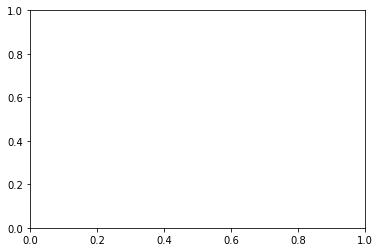

In [ ]:
User1=sns.distplot(user, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
User1.set(xlabel="Number of Songs Per User", ylabel = "Density")

**by this graph we get to know about ther e are some user who played more song.**

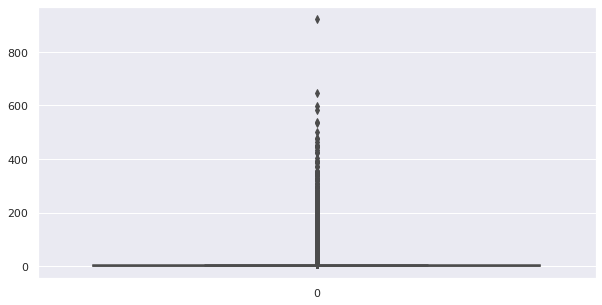

In [ ]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df_final.freq)

In [ ]:
df_final.freq.skew()

17.24384045828895

**By seeing skew value of Freq column  the data is not normally distributed , it is highly positive skew  which means when freq value  is high then users are less  ,when freq is low then user are more**